# Ridge Regression 

When there are many  correlated variables in a linear regression model, their
coefficients can become poorly determined and exhibit high variance.
A wildly large positive coefficient on one variable can be canceled by similarly
large negative coefficient on its correlated cousin.

Ridge regression is a variant of least squares regression and is oftentimes used when multicollinearity 
cases are identified. The traditional ordinary least squares (OLS) regression produces unbiased 
estimates for the regression coefficients, however, if you introduce the confounding issue of highly 
correlated explanatory variables, your resulting OLS parameter estimates end up with large variance. 
Therefore, it could be beneficial to utilize a technique such as ridge regression in order 
to ensure a smaller variance in resulting parameter estimates. 
This method is more continuos, and don't suffer as much from high variability.

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
df_heart_rate = pd.read_csv("../data/dataset.csv")
df_heart_rate.sample(5)

,ILLUM,HUMID,CO2,SOUND,TEMP,RYTHM,ID
5474,495.67,71.69,601.05,26.24,19.34,86.10,1373
10410,270.48,61.59,553.20,27.41,19.89,66.04,3109
5488,451.13,60.43,508.37,36.80,19.22,75.48,1387
8062,542.20,73.02,394.17,32.23,19.85,77.74,761
6244,506.34,60.83,501.74,25.96,20.54,86.79,2143


In [52]:
df02_heart_rate = df_heart_rate[["ID","ILLUM","HUMID","CO2","SOUND","TEMP","RYTHM"]]

In [53]:
df03_heart_rate = df02_heart_rate.drop_duplicates()

In [54]:
X = df03_heart_rate[["ILLUM","HUMID","CO2","SOUND","TEMP"]]
y = df03_heart_rate["RYTHM"]

In [55]:
#Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [56]:
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)

Ridge()

In [57]:
predictions = clf.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 37.18011687998504
RMSE: 6.097550071953902
R2: 0.17328468166469213


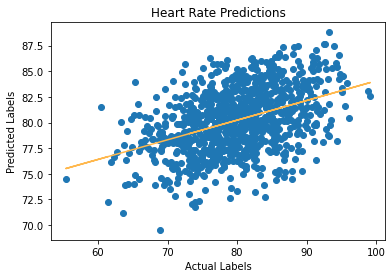

In [58]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Heart Rate Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='#ffb84d')
plt.show()

Reference 

https://www.sas.com/content/dam/SAS/support/en/sas-global-forum-proceedings/2018/2825-2018.pdf